In [1]:
import sys
sys.path.append('/home/joao.pires/MPP/neural_mpp/EM/Refact/')
from models import NormalizingFlow
from sweep import HawkesSweep
from granger import GrangerMPP

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_points = 600
time = np.arange(n_points)


X1 = np.random.binomial(1, 0.6, n_points)
X2 = np.zeros(n_points)
X3 = np.zeros(n_points)


for t in range(1, n_points):
    # X2 is more likely to happen if X1 happened in the previous step
    X2[t] = np.random.binomial(1, 0.5 * X1[t-1] + 0.2)
    # X3 is more likely to happen if X2 happened in the previous step
    X3[t] = np.random.binomial(1, 0.7 * X2[t-1] + 0.2)



X1 = [time[i] for i in range(len(X1)) if X1[i] > 0]
X2 = [time[i] + 0.1 for i in range(len(X2)) if X2[i] > 0]
X3 = [time[i] + 0.2 for i in range(len(X3)) if X3[i] > 0]

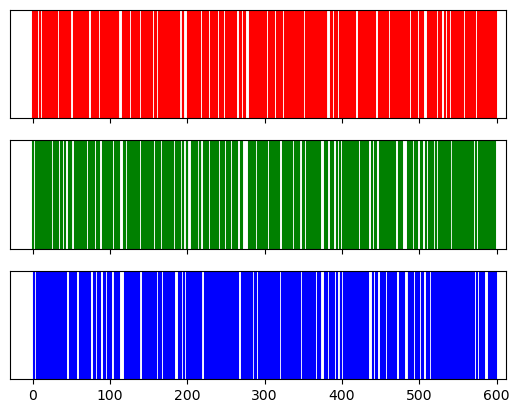

In [3]:
def _plot_tick_bars(timestamps_i, ax, color):
    for t in timestamps_i:
        ax.axvline(x=t, color = color)
    # ax.set_title(label, fontsize=20)
    ax.get_yaxis().set_visible(False)
def _plot_tick_bars_causes(timestamps_i, ax, cause):
    colors = ['red', 'green', 'blue']
    for idx, t in enumerate(timestamps_i):
        cause_ = torch.argmax(cause[idx]).item()
        ax.axvline(x=t, color = colors[cause_])
    ax.get_yaxis().set_visible(False)

fig, ax = plt.subplots(nrows = 3, sharex = True)

_plot_tick_bars(X1, ax[0], color = 'red')
_plot_tick_bars(X2, ax[1], color = 'green')
_plot_tick_bars(X3, ax[2], color = 'blue')

In [4]:
import torch

X1_ = torch.tensor(X1.copy(), dtype = torch.float32)
X2_ = torch.tensor(X2.copy(), dtype = torch.float32)
X3_ = torch.tensor(X3.copy(), dtype = torch.float32)
processes = [X1_, X2_, X3_]

In [5]:
hk = HawkesSweep(processes, 4)

In [6]:
granger = GrangerMPP(hk)

In [7]:
l = granger.em_step(75)

Step: 1, Model: 0, Loss: 4.82615852355957
Step: 1, Model: 1, Loss: 6.854498386383057
Step: 1, Model: 2, Loss: 4.596513748168945
Step: 5, Model: 0, Loss: 3.4963467121124268
Step: 5, Model: 1, Loss: 4.914289951324463
Step: 5, Model: 2, Loss: 3.464313268661499
Step: 10, Model: 0, Loss: 3.222651720046997
Step: 10, Model: 1, Loss: 3.552464485168457
Step: 10, Model: 2, Loss: 3.06356143951416
Step: 15, Model: 0, Loss: 2.648925542831421
Step: 15, Model: 1, Loss: 3.0372602939605713
Step: 15, Model: 2, Loss: 2.983696460723877
Step: 20, Model: 0, Loss: 2.482151985168457
Step: 20, Model: 1, Loss: 3.204584836959839
Step: 20, Model: 2, Loss: 2.9542934894561768
Step: 25, Model: 0, Loss: 2.7019946575164795
Step: 25, Model: 1, Loss: 2.7401955127716064
Step: 25, Model: 2, Loss: 2.751802921295166
Step: 30, Model: 0, Loss: 2.674808979034424
Step: 30, Model: 1, Loss: 2.801081418991089
Step: 30, Model: 2, Loss: 2.7802493572235107
Step: 35, Model: 0, Loss: 2.630671501159668
Step: 35, Model: 1, Loss: 2.650366

Len of losses: [5250, 4575, 4950]


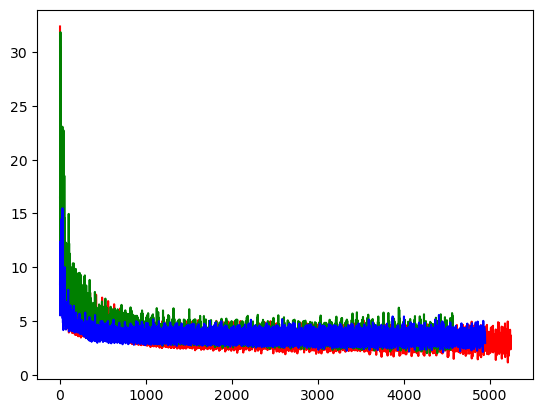

In [9]:
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.plot(l[i], color = colors[i])

t = [len(l[i]) for i in range(3)]

print(f'Len of losses: {t}')

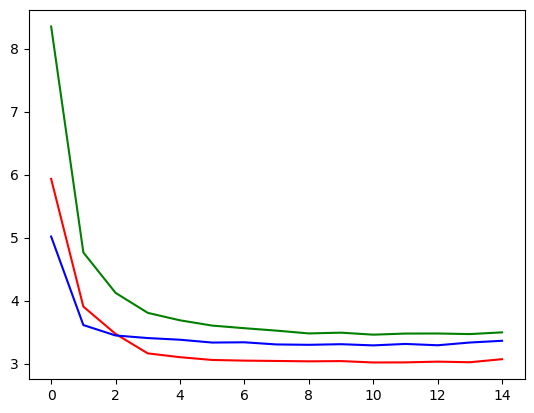

In [10]:
final = []
for proc in range(3):
    proc_size = len(processes[proc])
    loss_size = len(l[proc])
    temp = [ sum(l[proc][i:i + proc_size])/proc_size for i in range(0, loss_size - proc_size, proc_size)]
    final.append(temp)

colors = ['red', 'green', 'blue']
for i in range(3):
    plt.plot(final[i], color = colors[i])

In [26]:
granger.GrangerMatrix.softmax(dim = 1)

tensor([[0.3845, 0.2668, 0.3487],
        [0.5388, 0.1904, 0.2708],
        [0.4008, 0.3437, 0.2555]], grad_fn=<SoftmaxBackward0>)

(-0.5, 2.5, 2.5, -0.5)

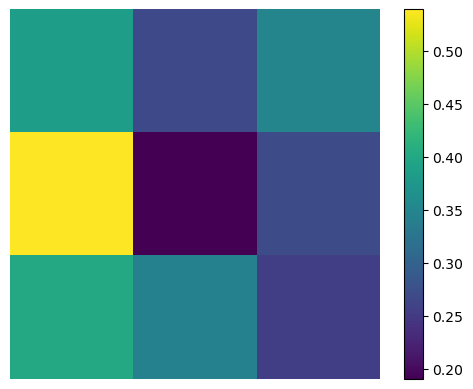

In [27]:
plt.imshow(granger.GrangerMatrix.softmax(dim = 1).detach().cpu())
plt.colorbar()
plt.axis('off')